<a href="https://colab.research.google.com/github/alowny-code/Seismic_response_analysis/blob/main/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
cols = ['flength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fN3long', 'fN3trans', 'fAlpha', 'fDist', 'Class']
data = pd.read_csv('magic04.data', names=cols)

In [4]:
data.head()

,flength,fWidth,fSize,fConc,fConc1,fAsym,fN3long,fN3trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
from sklearn.preprocessing import LabelEncoder
#data['Class'] = LabelEncoder().fit_transform(data['Class'])
# Alternatively
data['Class'] = (data['Class'] == 'g').astype(int)

In [6]:
data.head()

,flength,fWidth,fSize,fConc,fConc1,fAsym,fN3long,fN3trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


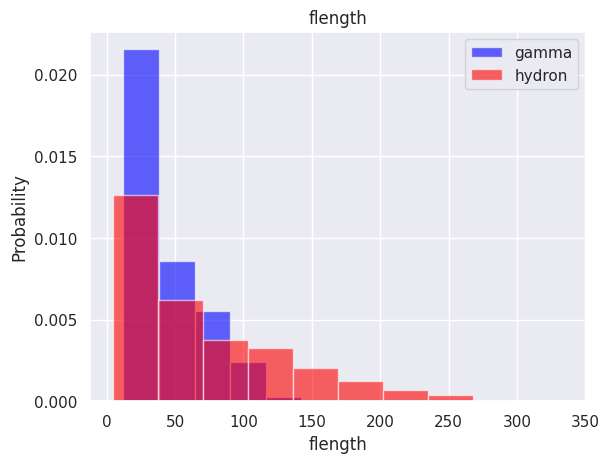

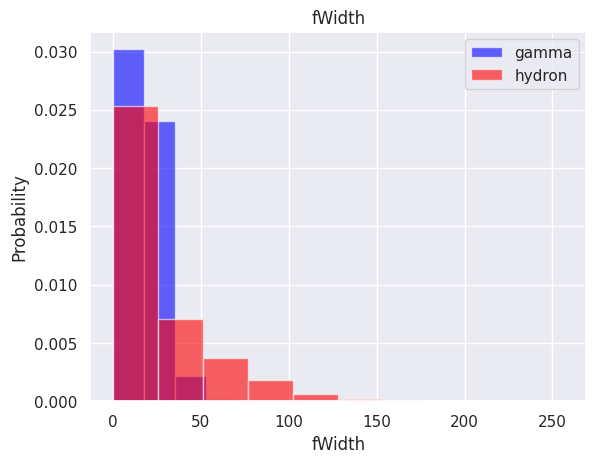

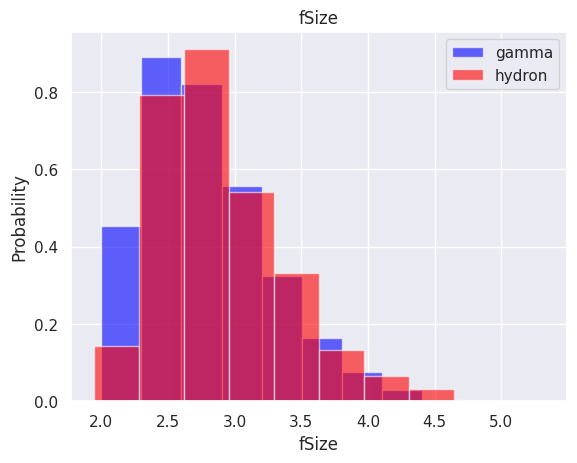

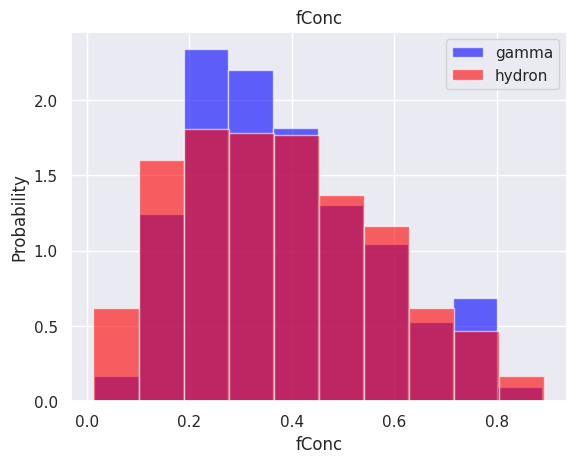

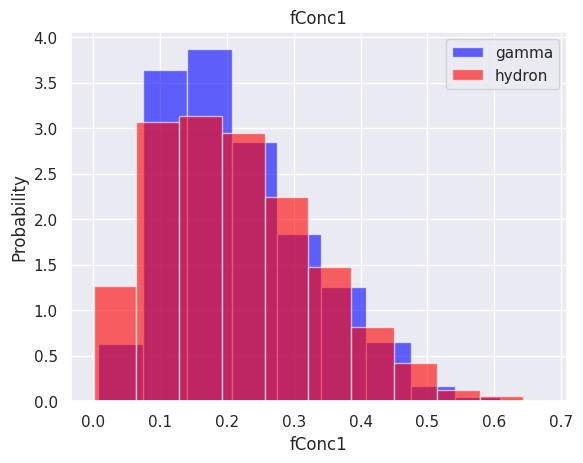

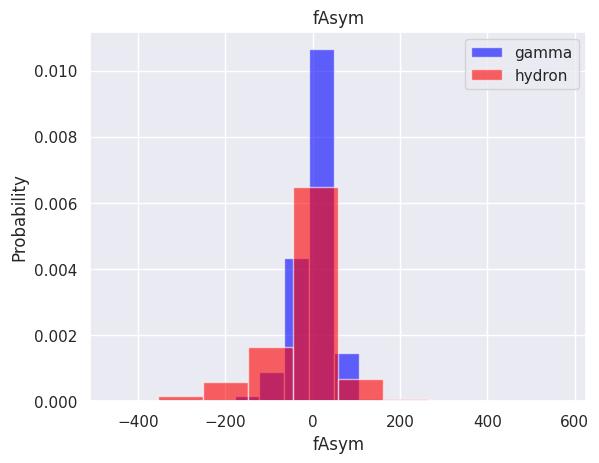

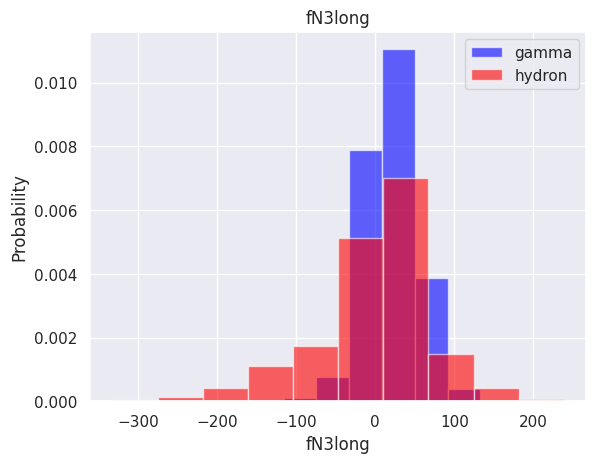

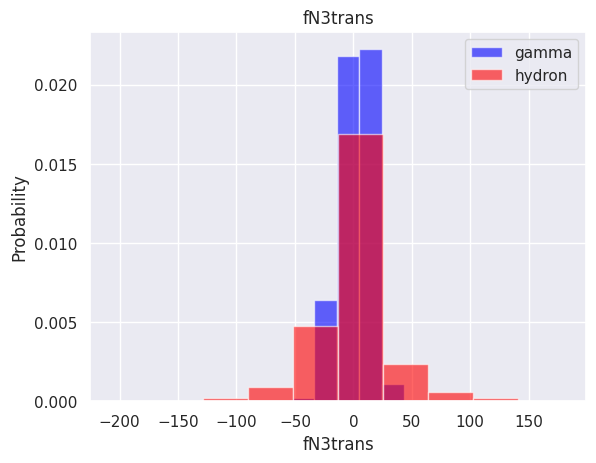

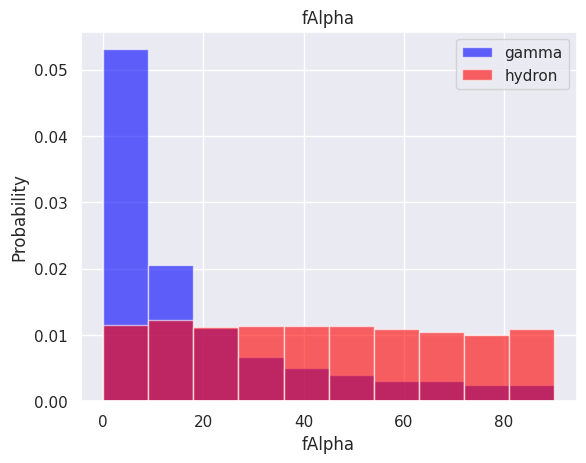

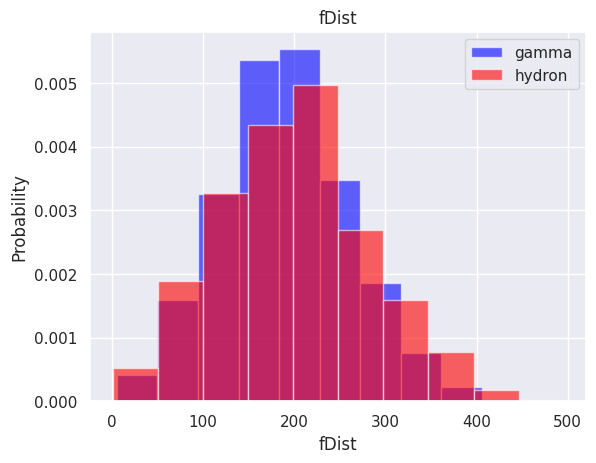

In [7]:
for label in cols[:-1]:
    plt.hist(data[data['Class']==1][label], color='blue', label='gamma', alpha=0.6, density=True)
    plt.hist(data[data['Class']==0][label], color='red', label='hydron', alpha=0.6, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [8]:
# Train, validation, test datasets
train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))] )

In [13]:
# feature scaling
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversampler=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversampler:
      ros = RandomOverSampler()
      x, y = ros.fit_resample(x, y)

    data = np.hstack([x, np.reshape(y, (-1, 1))])

    return data, x, y

In [10]:
# over sampling. when length of different categories are far from eachother
# checking for length of different categories
print(len(train[train['Class']==1]))    # gamma
print(len(train[train['Class']==0]))    # hydron

7429
3983


In [14]:
train, x_train, y_train = scale_dataset(train, True)

In [17]:
y_train

array([1, 1, 1, ..., 0, 0, 0])